In [198]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from imageio import imwrite, imread
from matplotlib.pyplot import figure, show, close, xlabel, ylabel, title
from scipy.constants import k, h, c,e
import sympy as sp
from scipy.optimize import curve_fit
from astropy.visualization import simple_norm, MinMaxInterval

In [199]:
vega_data = np.loadtxt("baseline_subtracted.txt", comments="#")
print(vega_data)

[7243.07636459 7254.32246281 7451.21975527 ...  871.94500451  874.95074311
  876.01626339]


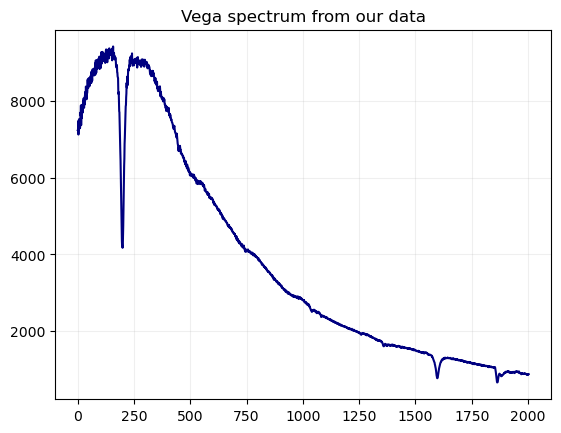

In [200]:
fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_data,color="navy", label="Vega spectrum")
frame.set_title("Vega spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)

Filename: miles spectra/vega_miles.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   (4367, 1)   float32   

data shape: (1, 4367)


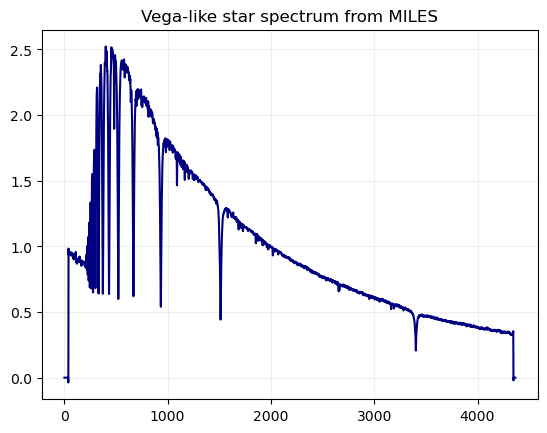

In [201]:
# getting some basic information on the miles spectrum

hdulist = fits.open('miles spectra/vega_miles.fits')
hdulist.info()
print()

hdr = hdulist[0].header
dat = hdulist[0].data
print(f"data shape: {dat.shape}")
vega_miles = dat[0,:]

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_miles,color="navy", label="Vega spectrum")
frame.set_title("Vega-like star spectrum from MILES")
frame.grid(alpha=0.2)
show()
close(fig)


In [202]:
# checking coherence
print(dat.any())
print(dat.all())
print(hdr)

True
False
SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 4367 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format is defined in 'AstronomyCOMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H COMMENT ----------------------------------------------------------------------  COMMENT ************************** REDUCEME HEADER ***************************  COMMENT ----------------------------------------------------------------------  HISTORY Date: 06/10/**                                                          CRPIX1  =                 1.00                                                  CRVAL1  =            3500.000

In [203]:
hdulist.close()

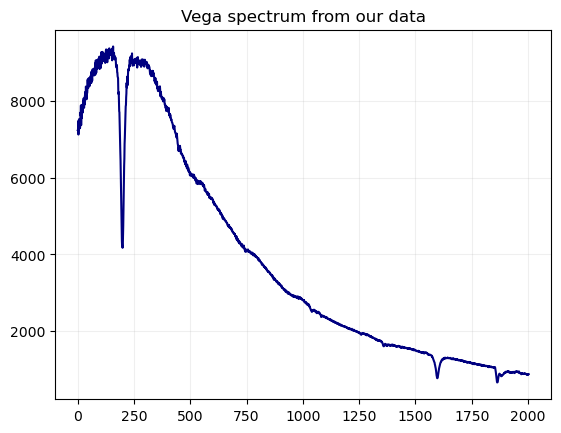

In [204]:
# defining functions for fitting the spectra

def f_gaussian(x, amp, mu, sigma, zero):
    """returns the value of a Gaussian function with amplitude amp centered at position mu with width sigma and 
    offset with respect to the x-axis off zero"""
    # amp, mu, sigma, zero = p
    return amp * np.exp(-(x - mu) * (x - mu) / (2.0 * sigma * sigma)) + zero

def f_black_body(x, T):
    """returns the value of a black body curve equation for temperature T at position x"""
    #T=p[0]
    f=(((2*h)/((c**2)*(x**3)))*(1/(e**(h/(x*k*T))-1)))
    return f

# fitting black body curve to our Vega

T = 9600

#fitted_T = beta[0]
#print(f"Fitted Temperature: {fitted_T}")
#b

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_data,color="navy", label="Vega spectrum")
#frame.plot(f_black_body(np.arange(1,vega_data.size + 1), fitted_T),color="lightblue", label="Fitted Temperature")
frame.set_title("Vega spectrum from our data")
frame.grid(alpha=0.2)
show()
close(fig)


Filename: Reynier files/vega_wl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2004,)   float32   

data shape: (1, 4367)


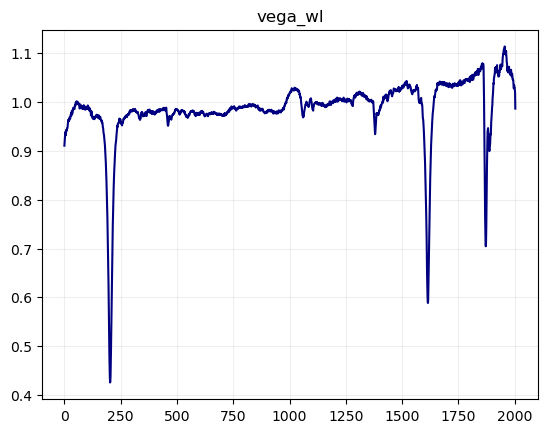

Filename: Reynier files/vega1_wl.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      35   (2003,)   float32   

data shape: (1, 4367)


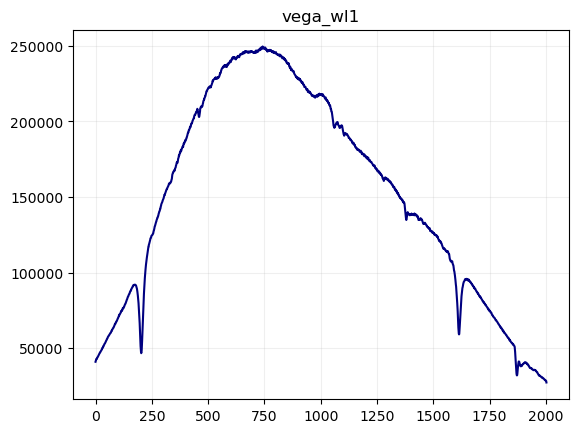

In [205]:
hdulist = fits.open('Reynier files/vega_wl.fits')
hdulist.info()
print()

hdr = hdulist[0].header
dat_vega_0 = hdulist[0].data
print(f"data shape: {dat.shape}")


fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(dat_vega_0,color="navy", label="Vega spectrum")
frame.set_title("vega_wl")
frame.grid(alpha=0.2)
show()
close(fig)

hdulist.close()
hdulist = fits.open('Reynier files/vega1_wl.fits')
hdulist.info()
print()

hdr = hdulist[0].header
dat_vega_1 = hdulist[0].data
print(f"data shape: {dat.shape}")


fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(dat_vega_1,color="navy", label="Vega spectrum")
frame.set_title("vega_wl1")
frame.grid(alpha=0.2)
show()
close(fig)
hdulist.close()

[ -0.51061994 204.30375662  10.77127229   0.993915  ]


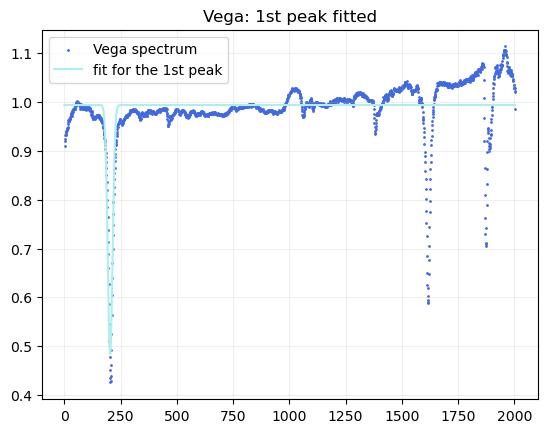

In [206]:
# Making a Gaussian fit for the 1st absorption peak, plotting it

beta, pcov1 = curve_fit(f_gaussian, np.arange(1, dat_vega_0.size+1), dat_vega_0, p0=(-0.6, 190, 40, 1))
#amp, mu, sigma, zero

print(beta)

a1,m1,s1,z1=beta
x_range = np.arange(1, dat_vega_0.size+1)

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_vega_0,color="royalblue", label="Vega spectrum",s=1)
frame.plot(f_gaussian(x_range,a1,m1,s1,z1),color="paleturquoise", label="fit for the 1st peak")
frame.set_title("Vega: 1st peak fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

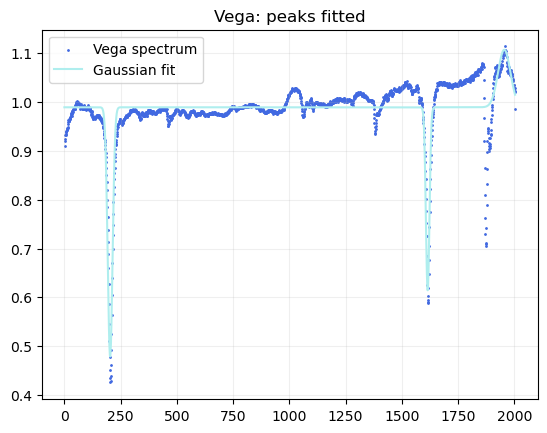

In [207]:
# I will take the offset fit for all three peak fits and take the mean, to obtain the average value
# or the weighted average, i'll see which one yields more accurate data

# also the fit doesn't really reach the bottom of the peak??? i don't know why, i'll TODO: try to find a better way to fit it if i have the time
# shouldn't really matter for the FWHM anyway

beta, pcov2 = curve_fit(f_gaussian, x_range, dat_vega_0, p0=(-0.4, 1600, 20, 1.02))
#amp, mu, sigma, zero
# print(beta)
a2,m2,s2,z2=beta

beta, pcov3 = curve_fit(f_gaussian, x_range, dat_vega_0, p0=(-0.4, 1950, 20, 1.05))
a3,m3,s3,z3=beta

z = np.mean([z1,z2,z3])


f_composed = f_gaussian(x_range,a1,m1,s1,z)+f_gaussian(x_range,a2,m2,s2,0)+f_gaussian(x_range,a3,m3,s3,0)
fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_vega_0,color="royalblue", label="Vega spectrum",s=1)
frame.plot(f_composed,color="paleturquoise", label="Gaussian fit")
frame.set_title("Vega: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

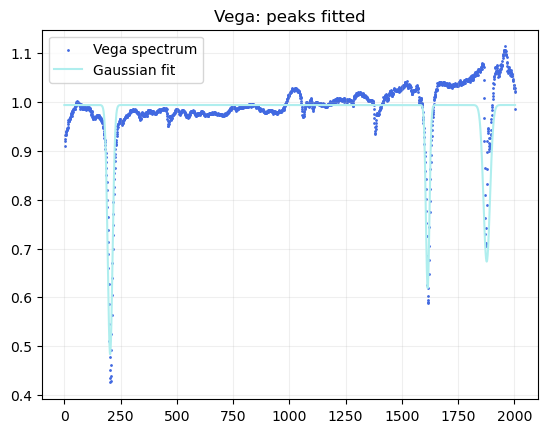

In [208]:
# separate code for the 3rd peak because it's being quirky; TODO: add 4th peak at ~1400 
# wait is it an emission peak??? should vega even have emission?????? no it shouldn't
# my interpretation: H-alpha, H-beta, Telluric band TODO: make it an actual band

x_range_3rdpeak = np.arange(1850,1900)

beta, pcov3 = curve_fit(f_gaussian, x_range_3rdpeak, dat_vega_0[1850:1900], p0=(-0.4, 1900, 20, 1.05))

a3,m3,s3,z3=beta
# f_3rdpeak = np.zeros(x_range)
# f_3rdpeak[range(1850,1900)]=f_gaussian(x_range,a3,m3,s3,0)

z = np.median([z1,z2,z3])

f_composed = f_gaussian(x_range,a1,m1,s1,z)+f_gaussian(x_range,a2,m2,s2,0)+f_gaussian(x_range,a3,m3,s3,0)
fig=figure()
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_vega_0,color="royalblue", label="Vega spectrum",s=1)
frame.plot(f_composed,color="paleturquoise", label="Gaussian fit")
frame.set_title("Vega: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

In [209]:
fwhm1=2*s1*np.sqrt(2*np.log(2))
fwhm2=2*s2*np.sqrt(2*np.log(2))
fwhm3=2*s3*np.sqrt(2*np.log(2))

err1 = np.sqrt(np.diag(pcov1))
err2 = np.sqrt(np.diag(pcov2))
err3 = np.sqrt(np.diag(pcov3))

fwhm1_err=2*err1[2]*np.sqrt(2*np.log(2))
fwhm2_err=2*err2[2]*np.sqrt(2*np.log(2))
fwhm3_err=2*err3[2]*np.sqrt(2*np.log(2))

print(f"H-alpha peak width: {fwhm1}, error: {fwhm1_err}")
print(f"H-beta peak width: {fwhm2}, error: {fwhm2_err}")
print(f"Telluric band width: {fwhm3}, error: {fwhm3_err}")

H-alpha peak width: 25.364407887995966, error: 0.767719837133825
H-beta peak width: 18.64498476912358, error: 1.1485840316682896
Telluric band width: 34.12452985096749, error: 10.434713925349884


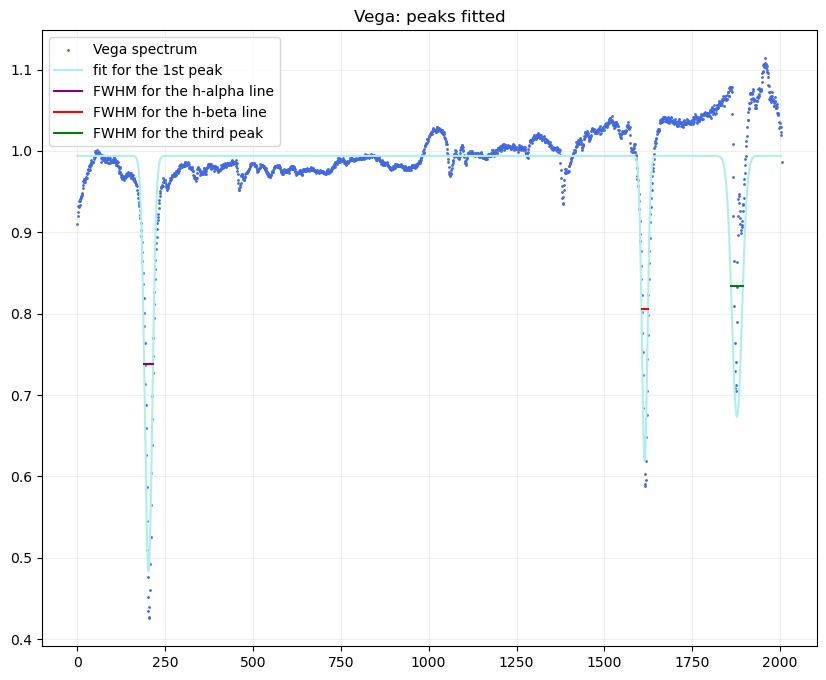

In [210]:
# plotting the FWHMs

fwhm1_x=np.array((m1-fwhm1/2,m1+fwhm1/2))
fwhm1_y=np.array((a1/2+z,a1/2+z))

fwhm2_x=np.array((m2-fwhm2/2,m2+fwhm2/2))
fwhm2_y=np.array((a2/2+z,a2/2+z))

fwhm3_x=np.array((m3-fwhm3/2,m3+fwhm3/2))
fwhm3_y=np.array((a3/2+z,a3/2+z))

fig=figure(figsize=(10,8))
frame=fig.add_subplot(1,1,1)
frame.scatter(x_range,dat_vega_0,color="royalblue", label="Vega spectrum",s=1)
frame.plot(f_composed,color="paleturquoise", label="fit for the 1st peak")
frame.plot(fwhm1_x,fwhm1_y,color="purple", label="FWHM for the h-alpha line")
frame.plot(fwhm2_x,fwhm2_y,color="red", label="FWHM for the h-beta line")
frame.plot(fwhm3_x,fwhm3_y,color="green", label="FWHM for the third peak")
frame.set_title("Vega: peaks fitted")
frame.grid(alpha=0.2)
frame.legend()
show()
close(fig)

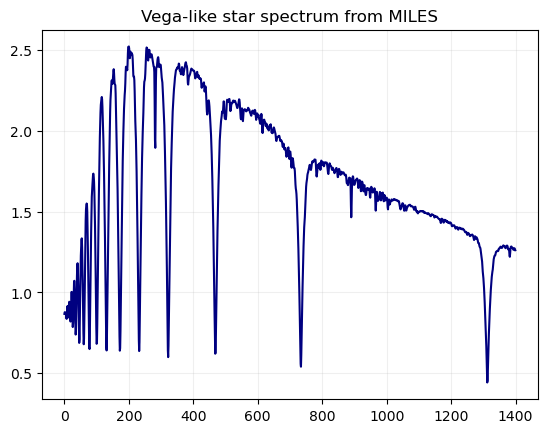

In [216]:
# the fight with MILES continues

fig=figure()
frame=fig.add_subplot(1,1,1)
frame.plot(vega_miles[200:1600],color="navy", label="Vega spectrum") # the section of the data that seems relevant
frame.set_title("Vega-like star spectrum from MILES")
frame.grid(alpha=0.2)
show()
close(fig)

In [ ]:
# first ~400 still looks like ventricular fibrillation (aka heart attack) but gonna normalise it and see where it leads


In [211]:
# stolen code for wavelength calibration TODO: calibrate wavelengths ig


# Location of the peaks in our image
a1 = np.array([199,1597,1863])
# Values from literature: Hb = 486.1, Ha = 656.3, O2 = 686.9
c1 = np.array([486.1,656.3,686.9])
a2 = np.arange(0,x_range)

def wavelenghtfit(a1,c1):
    ''''
    Function to calculate the wavelenght calibration polynomial
    input: a1 and c1 are arrays where the first is the pixel values found and c1 are the wavelength values
    output: wavelenght calibration polynomial
    '''
    y = np.poly1d(np.polyfit(a1,c1,1))
    return(y)

y = (wavelenghtfit(a1,c1))

wavelenght_calibrated = np.polyval(y, a2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

here's the GitHub commit message prefixes:
-feat (add feature)
-fix (repaired bug/broken code)
-refactor (changed code structure but didnt add new features)
-style (if you just changed some minor thing, spelling, variable names, ect.)